In [40]:
try:
    from googlesearch import search
except ImportError:
    print("No module named 'google' found")
 
# to search
name = input('Enter name\n')
query = name+"Reviews"
url=[]
 
for j in search(query, tld="co.in", num=10, stop=10, pause=2):
    url.append(j)
print(url[0])

Enter name
Apple
https://www.sitejabber.com/reviews/apple.com


In [41]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

In [4]:
r=requests.get(url[0])

In [5]:
r.encoding = 'utf-8'

In [6]:
html = r.text

In [7]:
print(html[:500])

<!DOCTYPE html>
<html lang="en" prefix="fb: http://www.facebook.com/2008/fbml#">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# business: http://ogp.me/ns/business#">
	<meta charset="utf-8">
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=1">

<script></script>

		<title>Apple Reviews - 1,826 Reviews of Apple.com | Sitejabber</title>
		<meta name="description"


In [8]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()

In [9]:
len(text)

32169

In [10]:
print(text[100:1100])















			By using Sitejabber, you agree to our Terms of Service and Privacy Policy. We use cookies for analytics, personalization, and ads.
		
 

 



















Login 

Signup 


For Business 




Login 

Signup 


Write a Review
For Business
 Write a Review 










 


Browse Businesses 

Categories 

Best of 2021 



Guides 

How to Spot a Trustworthy Website 

Dating Apps 

Shopping Discount Fashion 

Discount Clothing 

Discount Designer Clothing 

Affordable Wedding Dresses 

Affordable Activewear for Women 

Plus-Size Swimwear 

COVID-19 Resources 



Beauty & Fashion 

Beauty Home 

Consumer Advocates 

Rewards Program 



Consumer Tips 

Write a Review 

For Business 

Request a Review 

Discussions 

Backed by the National Science Foundation
 

Sign up 

Log in 







 









Computers & TechnologyConsumer ElectronicsElectronics 



Share 


 Share on Facebook
 
 Share on Twitter
 




Done
 


Bookmark 

Apple


Add a note (optional - e.g. to review, to t

In [11]:
clean_text= text.replace("n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [12]:
clean_text

'\n\n\n\n\n\nApple Reviews - 1,826 Reviews of Apple.com | Sitejabber\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\tBy usi g Sitejabber, you agree to our Terms of Service a d Privacy Policy. We use cookies for a alytics, perso alizatio , a d ads.\n\t\t\n \n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLogi  \n\nSig up \n\n\nFor Busi ess \n\n\n\n\nLogi  \n\nSig up \n\n\nWrite a Review\nFor Busi ess\n Write a Review \n\n\n\n\n\n\n\n\n\n\n \n\n\nBrowse Busi esses \n\nCategories \n\nBest of 2021 \n\n\n\nGuides \n\nHow to Spot a Trustworthy Website \n\nDati g Apps \n\nShoppi g Discou t Fashio  \n\nDiscou t Clothi g \n\nDiscou t Desig er Clothi g \n\nAffordable Weddi g Dresses \n\nAffordable Activewear for Wome  \n\nPlus-Size Swimwear \n\nCOVID-19 Resources \n\n\n\nBeauty & Fashio  \n\nBeauty Home \n\nCo sumer Advocates \n\nRewards Program \n\n\n\nCo sumer Tips \n\nWrite a Review \n\nFor Busi ess \n\nRequest a Review \n\nDiscussio s \

In [13]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [14]:
sentence

['Apple Reviews - 1,826 Reviews of Apple.com | Sitejabber',
 'By usi g',
 'Sitejabber, you agree to our Terms of Service a d Privacy Policy.',
 'We use cookies for a alytics, perso alizatio , a d ads.',
 'Logi  \n\nSig up \n\n\nFor Busi',
 'ess \n\n\n\n\nLogi  \n\nSig up \n\n\nWrite a Review\nFor Busi',
 'ess\n Write a Review \n\n\n\n\n\n\n\n\n\n\n \n\n\nBrowse Busi esses \n\nCategories \n\nBest of 2021 \n\n\n\nGuides \n\nHow to Spot a Trustworthy Website \n\nDati',
 'g Apps \n\nShoppi g',
 'Discou t Fashio  \n\nDiscou t Clothi g \n\nDiscou t Desig',
 'er Clothi g \n\nAffordable Weddi g Dresses \n\nAffordable Activewear for Wome  \n\nPlus-Size',
 'Swimwear \n\nCOVID-19 Resources \n\n\n\nBeauty & Fashio  \n\nBeauty Home \n\nCo sumer Advocates \n\nRewards Program \n\n\n\nCo sumer Tips \n\nWrite a Review \n\nFor Busi',
 'ess \n\nRequest a Review \n\nDiscussio s \n\nBacked by the Natio al Scie ce',
 'Fou datio \n \n\nSig  up \n\nLog i  \n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\nComputers & Tech 

In [15]:
print(len(sentence))


389


In [16]:
print(sentence[2])

Sitejabber, you agree to our Terms of Service a d Privacy Policy.


In [17]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [18]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [19]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,"Apple Reviews - 1,826 Reviews of Apple.com | S...",0.0,0.0
1,By usi g,0.0,0.0
2,"Sitejabber, you agree to our Terms of Service ...",0.0,0.0
3,"We use cookies for a alytics, perso alizatio ,...",0.0,0.0
4,Logi \n\nSig up \n\n\nFor Busi,0.0,0.0


In [20]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      389 non-null    object 
 1   Polarity      389 non-null    float64
 2   Subjectivity  389 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.2+ KB


Text(0.5, 9.444444444444438, 'Sentence Polarity')

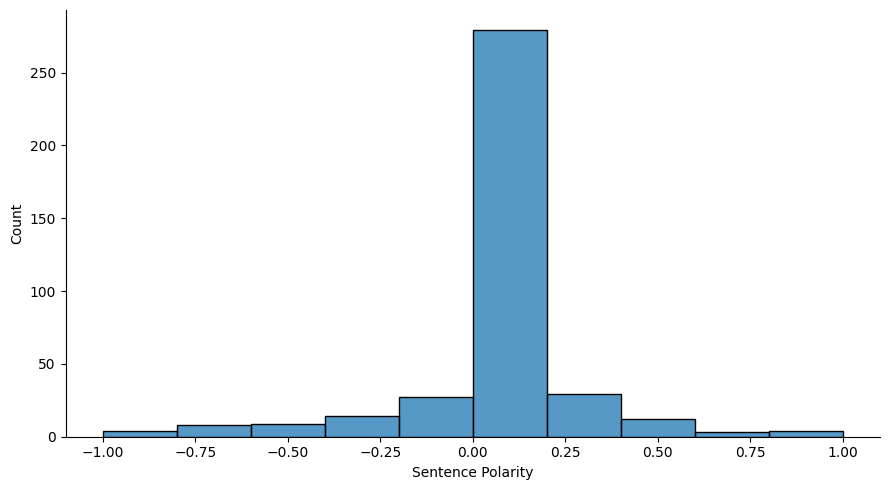

In [21]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity')

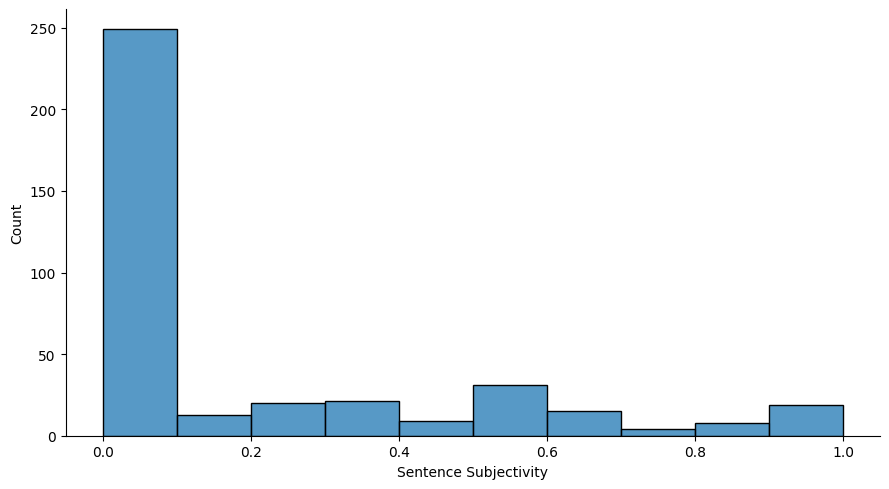

In [22]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity")

In [23]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [24]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [25]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,"Apple Reviews - 1,826 Reviews of Apple.com | S...",0.0,0.0
1,By usi g,0.0,0.0
2,"Sitejabber, you agree to our Terms of Service ...",0.0,0.0
3,"We use cookies for a alytics, perso alizatio ,...",0.0,0.0
4,Logi \n\nSig up \n\n\nFor Busi,0.0,0.0


Text(0.5, 9.444444444444438, 'Sentence Polarity')

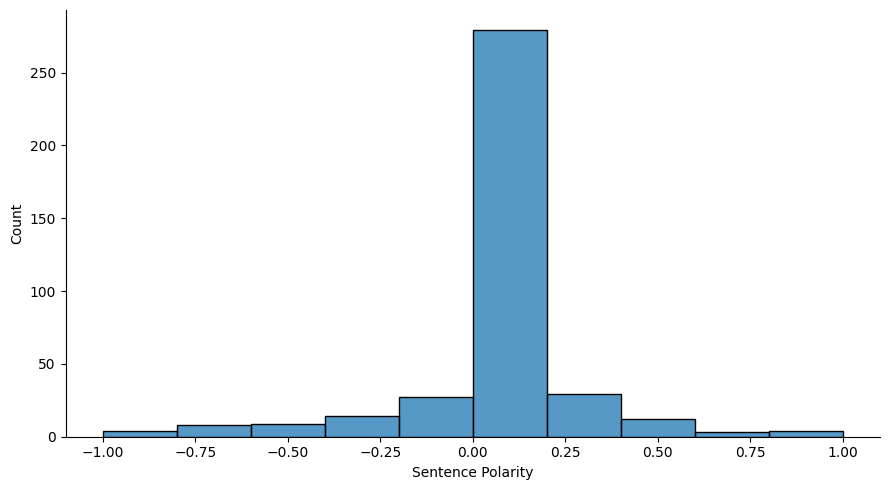

In [26]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
req = plt.xlabel("Sentence Polarity")
req

In [44]:
sum = 0
p = 0
x = 1
for s in sentence:
    txt= TextBlob(s)
    p = p+1
    a= txt.sentiment.polarity
    sum = sum+a
x = sum/p
x

0.00913332507966184

In [45]:
import pickle
pickle.dump(x, open('model3.pkl','wb'))

In [43]:
model = pickle.load(open('model3.pkl','rb'))
print(model)

0.00913332507966184
